In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram
  from qiskit import Aer,execute
  from qiskit.quantum_info import partial_trace,Statevector
except:
  print("Installing Corresponing Dependencies")
  ! pip install -q qiskit pylatexenc qiskit-aer
  ! pip install -q git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
  import qiskit
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_histogram
  from qiskit.quantum_info import partial_trace,Statevector
  from qiskit import Aer,execute

from math import pi

Dependencies are already installed. Skipping...


In [2]:
qiskit.__version__

'0.25.1'

In [3]:
!rm -r modules

In [4]:
import requests
from pathlib import Path
import os

directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py",
    "algorithms_utils.py":"https://github.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/raw/master/modules/utils/algorithms_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [5]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement
from modules.algorithms_utils import *

In [6]:
backend = Aer.get_backend('statevector_simulator')

# Grover Implementation

In [7]:
# Create a quantum circuit
num_qubits = 4
target_qubits = range(num_qubits)
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr,cr)
initialize_quantum_circuit(qc,target_qubits=target_qubits,hadamard=True)

In [8]:
qc.append(grover_iteration("1011"),target_qubits)


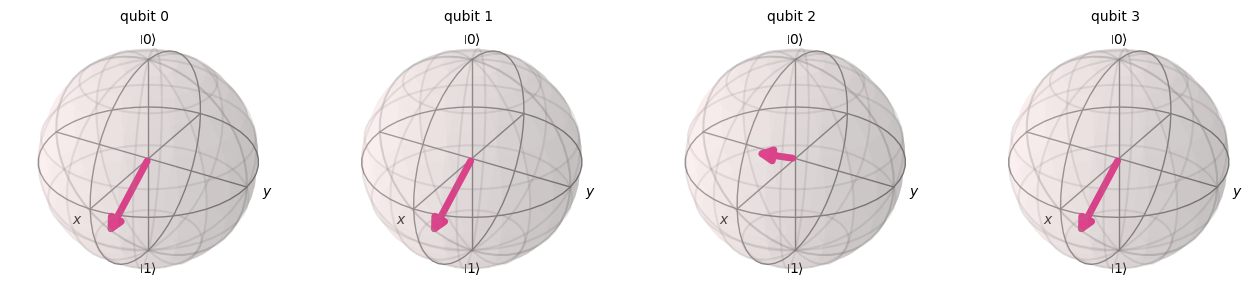

In [9]:
plot_bloch_multivector(Statevector(qc))

In [10]:
qc.measure(range(4),range(4))

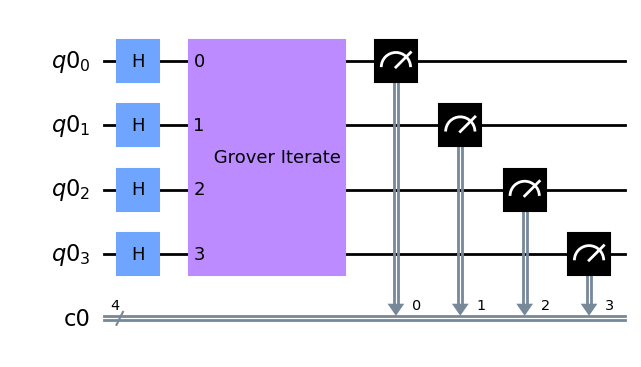

In [11]:
qc.draw("mpl")

In [12]:
counts = ideal_qc_simulation(qc,backend)

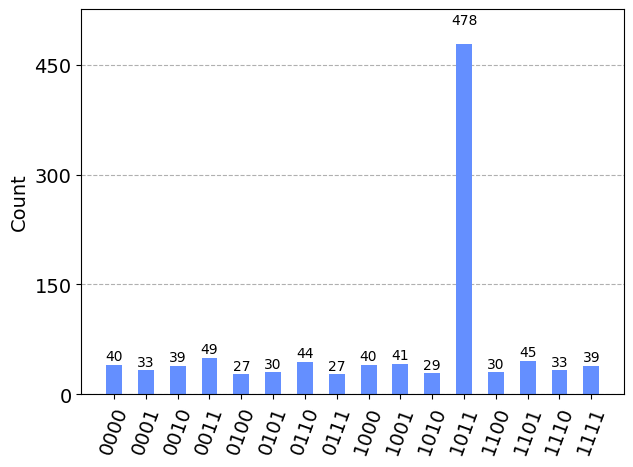

In [13]:
plot_histogram(counts)